In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


4422102/4422102 [==============================] - 3s 1us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


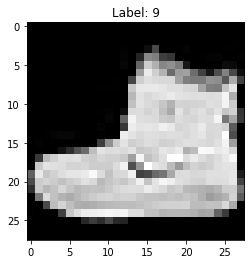

In [2]:
# Load the Fashion MNIST dataset from Keras
fashion_mnist = tf.keras.datasets.fashion_mnist

# Split the dataset into training and testing data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print the shapes of the datasets
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Plot the first image in the training dataset
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [3]:
# Normalize the data to range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the images to (28, 28, 1) for the CNN (grayscale image)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [4]:
# Build the CNN model
model = models.Sequential()

# Add the first convolutional layer with 32 filters
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output to feed into the fully connected layer
model.add(layers.Flatten())

# Add a dense layer with 128 units
model.add(layers.Dense(128, activation='relu'))

# Add the output layer with 10 units (for 10 classes)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/10
1875/1875 [==============================] - 73s 38ms/step - loss: 0.4413 - accuracy: 0.8416 - val_loss: 0.3379 - val_accuracy: 0.8787
Epoch 2/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2959 - accuracy: 0.8914 - val_loss: 0.3236 - val_accuracy: 0.8793
Epoch 3/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2488 - accuracy: 0.9074 - val_loss: 0.2698 - val_accuracy: 0.9021
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2175 - accuracy: 0.9191 - val_loss: 0.2760 - val_accuracy: 0.8986
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1918 - accuracy: 0.9294 - val_loss: 0.2564 - val_accuracy: 0.9069
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1698 - accuracy: 0.9361 - val_loss: 0.2720 - val_accuracy: 0.9021
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1500 - accuracy: 0.9435 - val_loss: 0.2488 -

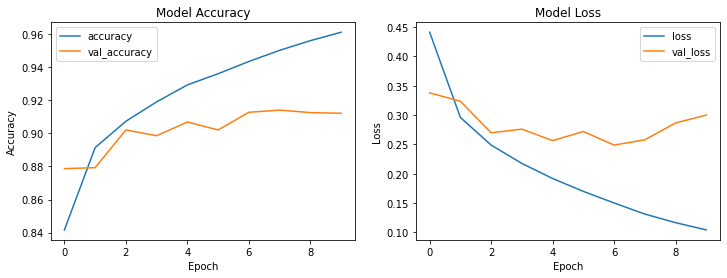

In [5]:
# Train the model with the training data
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the training and validation accuracy and loss graphs
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [6]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 3s 11ms/step - loss: 0.3000 - accuracy: 0.9122
Test accuracy: 0.9121999740600586


In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from collections import OrderedDict

# Download training and testing data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
train_ds = datasets.FashionMNIST('F_MNIST_data', download=True, train=True, transform=transform)
test_ds = datasets.FashionMNIST('F_MNIST_data', download=True, train=False, transform=transform)

ModuleNotFoundError: No module named 'torch'